# <p style="text-align: center;">EE 379K: Data Science Lab</p>
# <p style="text-align: center;">Lab 1 - 9/11/17</p>
## <p style="text-align: center;">Rachel Chen and Kevin Yee</p>


###Question 1:
1. Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5.
Create another 1000 samples from another independent Gaussian with mean 10 and standard
deviation 5.
(a) Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point,
and plot the histogram of the resulting 1000 points. What do you observe?
(b) Estimate the mean and the variance of the sum.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#Problem 1
X = np.random.normal(-10, 5, 1000)
Y = np.random.normal(10, 5, 1000)
Z = np.add(X,Y)
#https://stackoverflow.com/questions/38747612/whats-the-difference-between-numpy-adda-b-and-ab

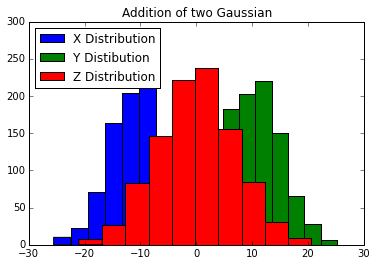

In [28]:
plt.title("Addition of two Gaussian")

plt.hist(X, label ='X Distribution')
plt.hist(Y, label = 'Y Distibution')
plt.hist(Z, label = 'Z Distribution')
plt.legend(loc = 'upper left')


In [29]:
print "The mean is",
print("%.2f" % np.mean(Z))
print "The variance is",
print("%.2f" % np.var(Z))

The mean is -0.04
The variance is 49.14


####Problem 1 Observations:
The sum of 2 independent Gaussians results in a Gaussian with the sum of the two means and sum of two variances.
i.e. given
$$X: N(\mu_x,\theta^2_x)$$
$$Y: N(\mu_y, \theta^2_y)$$
$$Z = X + Y$$

$$Z: N(\mu_x + \mu_y, \theta^2_x + \theta^2_y)$$

###Question 2:
2. Central Limit Theorem. Let Xi be an iid Bernoulli random variable with value {-1,1}.
Look at the random variable Zn =
1
n
PXi
. By taking 1000 draws from Zn, plot its histogram.
Check that for small n (say, 5-10) Zn does not look that much like a Gaussian, but when n
is bigger (already by the time n = 30 or 50) it looks much more like a Gaussian. Check also
for much bigger n: n = 250, to see that at this point, one can really see the bell curve.

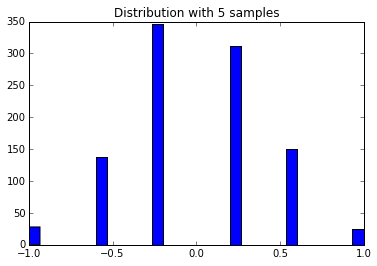

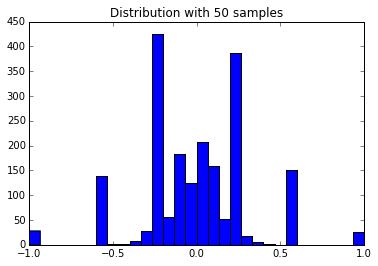

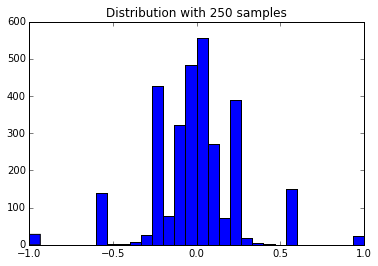

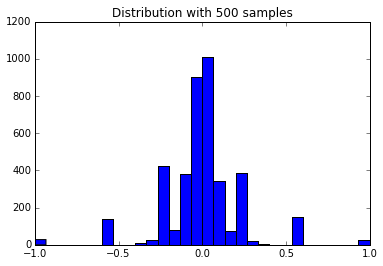

In [30]:
#Problem 2

#n-trials
numsamples = [5,50,250,500]
trials = []
for k in range(len(numsamples)):
    for j in range(1000):
        x = np.random.binomial(1, 0.5, numsamples[k]); #bernoulli
        for i in range(len(x)):
            if x[i] == 0: x[i] = -1
        trials.append(float(sum(x))/numsamples[k])
    plt.figure(k)
    plt.title("Distribution with " + str(numsamples[k]) + " samples")
    plt.hist(trials, bins = 30)

###Question 3:
3. Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples
from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean
and standard deviation of this gaussian using elementary numpy commands, i.e., addition,
multiplication, division (do not use a command that takes data and returns the mean or
standard deviation).

In [19]:
k = np.random.normal(0, 5, 25000)
mean = k.sum()/len(k)
std = np.sqrt(np.sum(np.square(k-mean))/len(k))
print mean
print std

0.0278567440405
5.00302340568


###Question 4:
4. Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples
of 2 dimensional data from the Gaussian distribution
Then, estimate the mean and covariance matrix for this multi-dimensional data using elementary
numpy commands, i.e., addition, multiplication, division (do not use a command that
takes data and returns the mean or standard deviation).

In [31]:
mean = [-5, 5]
cov = [[20, .8], [.8, 30]]
x = np.random.multivariate_normal(mean, cov, 10000)


(10000L, 2L)

#Written Questions

![](http://i.markdownnotes.com/image_NAAlIyn.png)

####1(a):
Marginal pmf from joint pmf: 
$$P(X = x) = \sum_y P(X=x,Y=y)$$
$$\therefore P(X = 1) = \frac{1}{4} + \frac{1}{3} = \frac{7}{12}$$

####1(b): 
Conditional Probability: $$P(X | Y) = \frac{P(X, Y)}{P(Y)}$$
$$\therefore P(X=1 | Y = 1) = \frac{1/3}{1/4 + 1/3}$$
$$P(X=1 | Y = 1) = \frac{4}{7}$$

####1(c):
Bernoulli Equation
$$P(X = 1) = \frac7{12}$$
$$P(X = 0 ) = \frac5{12}$$
$$\therefore pq = \frac7{12} * \frac5{12} = \frac{35}{72}$$

####1(d):
Bernoulli Equation
$$P(X = 1 | Y =1) = \frac4{7}$$
$$P(X = 1 | Y = 0 ) = \frac3{7}$$
$$\therefore pq = \frac4{7} * \frac3{7} = \frac{12}{49}$$

####1(e): 
$$E[X^3 + X^2 + 3Y^7 | Y =1]$$
$$ = E[X^3 | Y = 1] + E[X^2 | Y = 1] + 3 * E[Y^7 | Y = 1] $$

![](http://i.markdownnotes.com/image_sgMTWJI.png)

Let W be defined as the $$Span~(v_1, v_2)$$

In [32]:
def orthog(v1, v2, point):
    u1 = (np.dot(v1,point)/np.dot(v1,v1))*v1;
    u2 = (np.dot(v2,point))/np.dot(v2,v2)*v2;
    return u1 + u2;

In [33]:
v1 = [1, 1, 1];
v2 = [1, 0, 0];
P1 = [3, 3, 3];
P2 = [1, 2, 3];
P3 = [0, 0, 1];

print("Point 1 projection", orthog(np.transpose(v1),np.transpose(v2),np.transpose(P1)))
print("Point 2 projection", orthog(np.transpose(v1),np.transpose(v2),np.transpose(P2)))
print("Point 3 projection", orthog(np.transpose(v1),np.transpose(v2),np.transpose(P3)))

('Point 1 projection', array([6, 3, 3]))
('Point 2 projection', array([3, 2, 2]))
('Point 3 projection', array([0, 0, 0]))


![](http://i.markdownnotes.com/image_5gmzI2o.png)

Central Limit Theorem: $$\frac{S_n - n*E[X]}{\sqrt{n}\theta}$$
$$P(Head) = \frac{2}{3}$$vb  
Let $$X_i$$ be the random variable that a head is flipped.
where X = 1 if heads and 0 otherwise.
Then, let $$S_n = X_1 + X_2 +... X_n$$
Variance = $$\frac{2}{3} * \frac{1}{3}$$
Using CTL: $$\frac{50 - (100 * \frac{2}{3})}{\sqrt{100} * \sqrt{2/9}}$$
$$P(Z_{100} < -3.54) = \phi(-3.54)$$

In [34]:
import scipy.stats
scipy.stats.norm.cdf(-3.54)

0.0002000635160073201

$$P(Z_{100} < -3.54) = 0.0002$$
Probability of getting fewer than 50 heads is .02%